# 4. 데이터를 한 눈에! Visualization

## 4-1. 들어가며

### 학습 목표
---
- 파이썬 라이브러리(Pandas, Matplotlib, Seaborn)를 이용해서 여러 가지 그래프를 그리는 법을 학습합니다.
- 실전 데이터셋으로 직접 시각화해보며 데이터 분석에 필요한 탐색적 데이터 분석(EDA)을 하고 인사이트를 도출해 봅니다.

### 학습 목차
---
1. 파이썬으로 그래프를 그린다는 건?
2. 간단한 그래프 그리기
3. 그래프 4대 천왕: 막대그래프, 선그래프, 산점도, 히스토그램
4. 시계열 데이터 시각화하기
5. Heatmap

## 4-2. 파이썬으로 그래프를 그린다는 건?

### 준비물
---
환경 설치 확인

```c
$ pip list | grep matplotlib
$ pip list | grep seaborn
```

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

## 4-3. 간단한 그래프 그리기(1) 막대그래프 그려보기

### 데이터 정의
---

In [ ]:
import matplotlib.pyplot as plt
# IPython에서 사용하는 매직 메서드.
# Rich output : (그래프, 소리 등과 같은 결과물)에 대한 표현 방식
%matplotlib inline

# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

### 축 그리기
---

In [ ]:
# 축 그리기
fig = plt.figure() #도화지(그래프) 객체 생성
ax1 = fig.add_subplot(1,1,1) #figure()객체에 add_subplot 메서드를 이용해 축을 그려준다.

In [ ]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

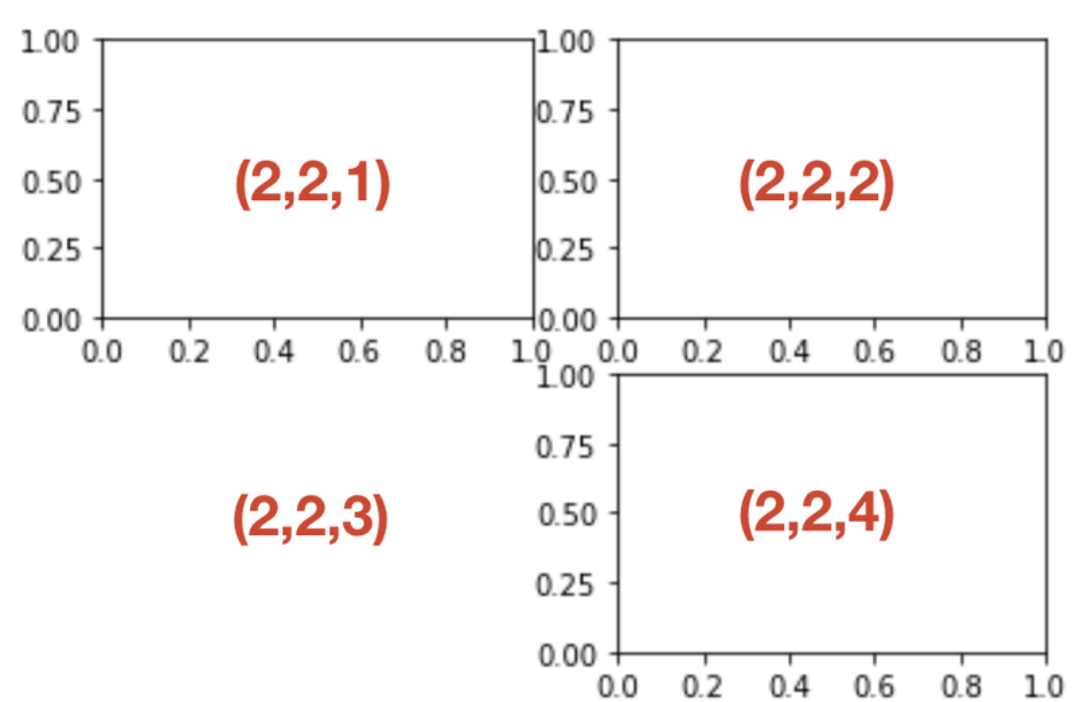

In [ ]:
# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject,points)

### 그래프 요소 추가
---

***label, title***

In [ ]:
# Q. 아래 코드의 빈칸을 채워주세요.
# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Henry's Test Result")

## 4-4. 간단한 그래프 그리기(2) 선 그래프 그려보기

### 데이터 정의
---
아마존 주가 데이터(https://finance.yahoo.com/quote/AMZN/history?p=AMZN)

```C
$ mkdir -p ~/aiffel/data_visualization
$ ln -s ~/data ~/aiffel/data_visualization/
```

In [ ]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/workplace/240523-data-visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

In [ ]:
# Q. 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프를 그려보세요!
# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/workplace/240523-data-visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1500, 2300])
plt.xlim(['2019-03-01', '2020-04-02'])

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()

# 주석달기
important_data = [(min_date, "Low Price"), (max_date, "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10),
                xytext=(d, price.asof(d)+100),
                arrowprops=dict(facecolor='red'))

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

## 4-5. 간단한 그래프 그리기(3) plot 사용법 상세

### plt.plot()로 그래프 그리기
---

In [ ]:
import numpy as np

# 0에서 10까지 균등한 가격으로 100개의 숫자를 만들라는 뜻입니다.
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

In [ ]:
x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), '--', color='orange')
plt.show()

### linestyle, marker 옵션
---

In [ ]:
x = np.linspace(0, 10, 100)

plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

In [ ]:
# Q. y=log(x)의 그래프를 그려봅시다.
# 라인 스타일은 dashdot, 색상은 'm'(magenta)으로 지정해주세요!
x = np.linspace(1, 10, 100)
y = np.log(x)

plt.plot(y, ':m')
plt.show()

### Pandas로 그래프 그리기
---

**pandas.plot 메서드 인자**
- label: 그래프의 범례 이름
- ax: 그래프를 그릴 matplotlib의 서브플롯 객체
- style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
- alpha: 투명도 (0 ~1)
- kind: 그래프의 종류: line, bar, barh, kde
- logy: Y축에 대한 로그 스케일
- use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot: 눈금 이름을 로테이션(0 ~ 360)
- xticks, yticks: x축, y축으로 사용할 값
- xlim, ylim: x축, y축 한계
- grid: 축의 그리드 표시할지 여부

**pandas의 data가 DataFrame 일 때 plot 메서드 인자**
- subplots: 각 DataFrame의 칼럼(column)을 독립된 서브플롯에 그립니다.
- sharex: subplots=True면 같은 X축을 공유하고 축의 범위와 눈금을 연결합니다.
- sharey: subplots=True면 같은 Y축을 공유합니다.
- figsize: 그래프의 크기를 지정합니다. (튜플)
- title: 그래프의 제목을 지정합니다. (문자열)
- sort_columns: 칼럼을 알파벳 순서로 그립니다.

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
plt.show()

In [ ]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A', 'B', 'C', 'D']))
df.plot(kind='line')
plt.show()

## 4-6. 간단한 그래프 그리기(4) 정리해 보자

### 정리
---

1. fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐'줍니다.
2. ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
3. ax1.bar(x, y) 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어줍니다.
4. 그래프 타이틀 축의 레이블 등을 plt의 여러 메서드 grid, xlabel, ylabel 을 이용해서 추가해 주고
5. plt.savefig 메서드를 이용해 저장해줍니다.

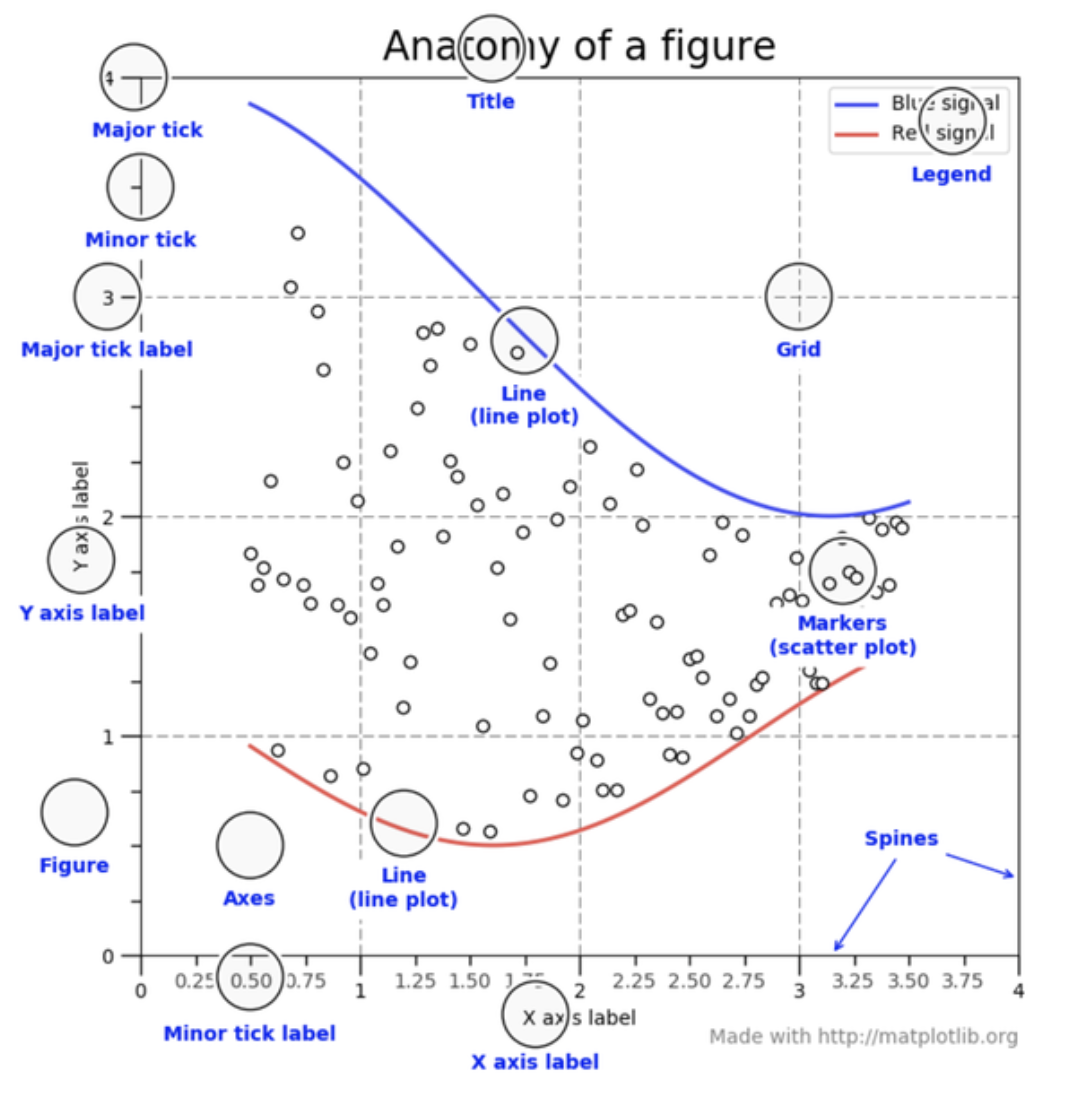

## 4-7. 그래프 4대 천왕(1) 데이터 준비

### 데이터 준비
---

**1) 데이터 불러오기**
- https://github.com/mwaskom/seaborn-data
- default directory: ~/seaborn-data/ (~(물결표시)는 home directory를 의미합니다.😃)
- https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

In [ ]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

**2) 데이터 불러오기**

In [ ]:
# dataframe의 처음 다섯 줄을 보여줍니다.
df = pd.DataFrame(tips)
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# Q. 다음 코드의 빈칸을 채워주세요.

# 'sex' 변수의 카테고리별 개수
print(df['sex'].value_counts())
print("===========================")

# 'time' 변수의 카테고리별 개수
print(df['time'].value_counts())
print("===========================")

# 'smoker' 변수의 카테고리별 개수
print(df['smoker'].value_counts())
print("===========================")

# 'day' 변수의 카테고리별 개수
print(df['day'].value_counts())
print("===========================")

# 'size' 변수의 카테고리별 개수
print(df['size'].value_counts())
print("===========================")

## 4-8. 그래프 4대 천왕(2) 범주형 데이터

### 범주형 데이터
---

**1) 막대그래프(bar graph)**

1-1) Pandas와 Matplotlib를 활용한 방법

In [ ]:
df.head()

In [ ]:
grouped = df['tip'].groupby(df['sex'])

In [ ]:
grouped.mean()

In [ ]:
grouped.size()

In [ ]:
import numpy as np
sex = dict(grouped.mean())
sex

In [ ]:
x = list(sex.keys())
x

In [ ]:
y = list(sex.values())
y

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

In [ ]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

group_by_day = df['tip'].groupby(df['day'])
day = dict(group_by_day.mean())

x2 = list(day.keys())
y2 = list(day.values())

plt.bar(x = x2, height = y2)

plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

In [ ]:
group_by_day.mean()

In [ ]:
group_by_day.size()

**1-2) Seaborn과 Matplotlib을 활용한 간단한 방법**

In [ ]:
sns.barplot(data=df, x='sex', y='tip')

In [ ]:
plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

In [ ]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

In [ ]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

In [ ]:
# Q. 시간대(time)에 따른 tips의 그래프를 catplot으로 표현해보세요!
sns.catplot(x='time', y='tip', jitter=False, data=tips)

## 4-9. 그래프 4대 천왕(3) 수치형 데이터

### 수치형 데이터
---
**2) 산점도(scatter plot)**

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r-.2,d=.3_r")

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

**3) 선 그래프(line graph)**

In [ ]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())
plt.show()

In [ ]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

In [ ]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

**4) 히스토그램**

↔ 가로축

- 계급: 변수의 구간, bin (or bucket)

↕ 세로축

- 도수: 빈도수, frequency

전체 총량: n

In [ ]:
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

In [ ]:
sns.histplot(df['total_bill'], label="total_bill")

# legend()를 이용하여 label을 표시해줍니다.
sns.histplot(df['tip'], label="tip").legend()

In [ ]:
# Q. pyplot을 이용해서 그려봅시다.
# bin의 개수는 50개로 지정해주세요.
df['tip_pct'] = df['total_bill']/df['tip']

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

patches = ax1.hist(df['tip_pct'], bins=50, density=True)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Percentage of Tip to Total Bill')

plt.show()

In [ ]:
# Q. 이번에는 seaborn을 이용해서 그려봅시다.
sns.histplot(df['tip_pct'], label="tip_pct").legend()

In [ ]:
df['tip_pct'].plot(kind='kde')

## 4-10. 시계열 데이터 시각화하기

**1) 데이터 가져오기**

In [ ]:
csv_path = os.getenv("HOME") + "/aiffel/workplace/240523-data-visualization/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

**2) 그래프 그리기**

In [ ]:
# seaborn barplot
sns.barplot(data=flights, x='year', y='passengers')

In [ ]:
# Q. seaborn pointplot을 그려봅시다.
sns.pointplot(data=flights, x='year', y='passengers')

In [ ]:
# Q. seaborn lineplot을 그려봅시다.
sns.lineplot(data=flights, x='year', y='passengers')

In [ ]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

In [ ]:
sns.histplot(flights['passengers'])

## 4-11. Heatmap

### Heatmap
---
- Heatmap을 그리기 위해 데이터를 pivot 해야 하는 경우가 있습니다.
    pivot이란 어떤 축, 점을 기준으로 바꾸다란 뜻입니다. 데이터 표를 재배치할 때도 pivot이라는 단어를 사용합니다. (엑셀, Database에도 등장하는 용어입니다.)

In [ ]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

In [ ]:
sns.heatmap(pivot)

In [ ]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

In [ ]:
# Q. cmap 인자를 "YlGnBu"로 지정하여 heatmap을 그려보세요!
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d", cmap="YlGnBu")

### 종합퀴즈
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tips = sns.load_dataset("tips")

In [ ]:
# Q. 시간대(time)에 따른 tip과 total_bill의 관계를 scatter plot으로 시각화해봅시다.
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')

In [ ]:
# Q. seaborn jointplot의 문서를 참고하여 아래와 같은 그래프를 그려보세요!
sns.jointplot(data=df, x='total_bill', y='tip', hue='time')